In [22]:
# booleans and masks in numpy
# very useful for filtering and modifying data based on certain criteria!

import numpy as np
import pandas as pd

seattle = pd.read_csv('data/Seattle2014.csv')
rainfall = np.array(seattle['PRCP'])
inches = rainfall/254.0   #1/10mm -> inches
inches.shape

#.shape looks extremely useful for determining the shape of data, as u said jon!
#alternatively, i can just add ['PRCP'].values to the end of the first line

(365,)

In [23]:
# the shape here looks like a list that's 365 entries with 0 columns.
# so a 1d array

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

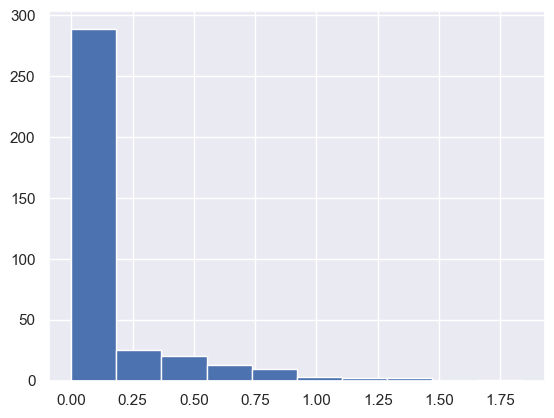

In [24]:
# not as much precipitation in seattle as you'd think

plt.hist(inches, 10);

In [45]:
# producing a boolean array to display True if inches<0.25

inches > 0
rainyDays = inches > 0
np.sum(rainyDays)

150

In [26]:
# how do we count these? using ufuncs! np.count_nonzero

notRainy = np.count_nonzero(inches < 0.25)
notRainy

299

In [27]:
# what if we want to calculate the number of days where
# inches is < 4 and > 1?
# use np.sum() and create a bool statement
# np.sum() will tally the number of true results and return a value

rainy = np.sum((inches > 1) & (inches < 4))
rainy

7

In [28]:
# big takeaway. np.sum() and similar ufuncs are super useful
# when used with boolean statements to tally results!

lightRain = np.sum((inches>0) & (inches<0.25))
lightRain

84

In [29]:
###

In [30]:
# creating this random array from the example journal

rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [31]:
# we can use a boolean to figure out how many are not 0
# as bool 0=False and 1+=True

np.count_nonzero(x)

11

In [32]:
# or how many are <6

np.count_nonzero(x < 6)

8

In [33]:
# we can also use np.sum() along with the extra functions
# to operate along rows and columns only

print(np.sum(x<6, axis=1)) #operates along rows, totalling number of values<6
print(np.sum(x<6, axis=0)) #same but with columns

[4 2 2]
[2 2 2 2]


In [34]:
# we can also use np.any and np.all to quickly prod the entire array

print(np.any(x==0))
print(np.all(x==0))

True
False


In [35]:
# as always, we can do this along rows and columns only

print(np.any(x==0, axis=1)) # checks if there are any 0s in each row
print(np.any(x==0, axis=0)) # same but columns

[ True False False]
[False  True False False]


In [36]:
# curious if i can add these and broadcast this to figure out
# where the zero is without using the original array

rows = np.any(x==0, axis=1).reshape((3,1)) #reshape to be 3 rows
columns = np.any(x==0, axis=0) #this already looks correct

print(rows)
print("\n")
print(columns)

[[ True]
 [False]
 [False]]


[False  True False False]


In [37]:
array = rows&columns
array

array([[False,  True, False, False],
       [False, False, False, False],
       [False, False, False, False]])

In [38]:
# works!
# jon, i wonder if there is a ufunc that can return the location
# of all true results?

In [39]:
# can use this syntax to return all values where the bool is true
# note: this returns them all in a list on one row!

x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [40]:
# since the index of inches is basically 'days' where Jan1=0
# lets create a corresponding list called days

days = np.arange(365)

# now lets use this list to create a boolean mask

winter = (days < 89) ^ (days > 345)
winter

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [41]:
# now this will only return the results where the boolean mask is true (in the winter)

winterMedian = np.median(inches[winter])
winterMedian

0.01968503937007874

In [54]:
# doing this again on my own again

dayz = np.arange(365)

birthdayWeek = (dayz < 308) & (days > 300)
birthdayWeek


birthdayWeekValues = inches[birthdayWeek]
birhtdayWeekAverage = np.median(inches[birthdayWeek])

print('the average rainfall on ur birthday week will be', birhtdayWeekAverage)
print('the rainfall on ur birthday week will be', birthdayWeekValues)

the average rainfall on ur birthday week will be 0.16141732283464566
the rainfall on ur birthday week will be [0.01968504 1.         0.66929134 0.         0.07086614 0.42913386
 0.16141732]
